## Edwin Prieto (1013597439)

<span style="color:red">Regresion Lineal</span>

In [124]:
pip install numpy pandas scikit-learn matplotlib scikit-learn  

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## 1. Análisis Datos

In [125]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Preprocesar Datos

In [126]:
#Columnas y filas
data.shape

(891, 12)

In [127]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [128]:
# Descripcion
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [129]:
# Columnas vacios
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

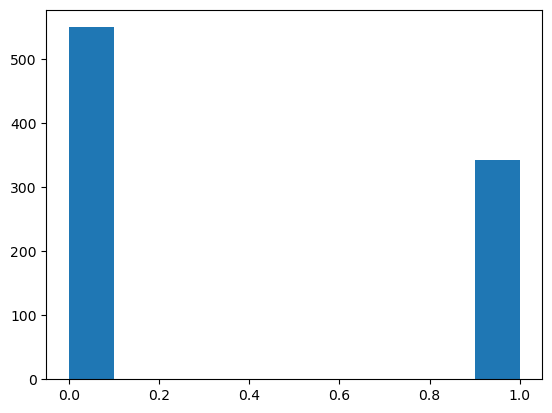

In [130]:
plt.hist(data.Survived)

In [131]:
promedio_age = data['Age'].mean()
data['Age'] = data['Age'].fillna(promedio_age)

In [132]:
# Columnas vacios
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [133]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

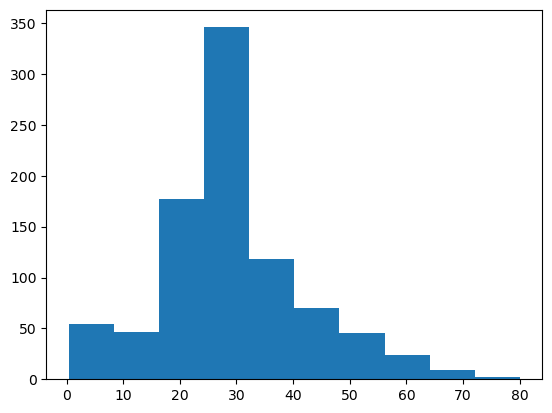

In [134]:
plt.hist(data.Age)

In [135]:
# Inicializar el codificador  
le = LabelEncoder() 
# Aplicar Label Encoding  
data['Sex'] = le.fit_transform(data['Sex']) 
print(data) 

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
..                                                 ...  .

## 3. Selección de Características

In [136]:
x = data[['Sex']]
y = data[['Survived']]

## 4. Dataset en Train y Test

In [137]:
#modelo = LinearRegression()

modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

## 5. hiperparámetros

In [138]:
beta_0 = modelo.intercept_
beta_1= modelo.coef_[0]

## 6. Evaluación de desempeño

In [139]:
print("Intercepto (B0):", beta_0)  
print("Coeficiente (B1):", beta_1)

Intercepto (B0): [0.74203822]
Coeficiente (B1): [-0.55313007]


## 7. Gráficas

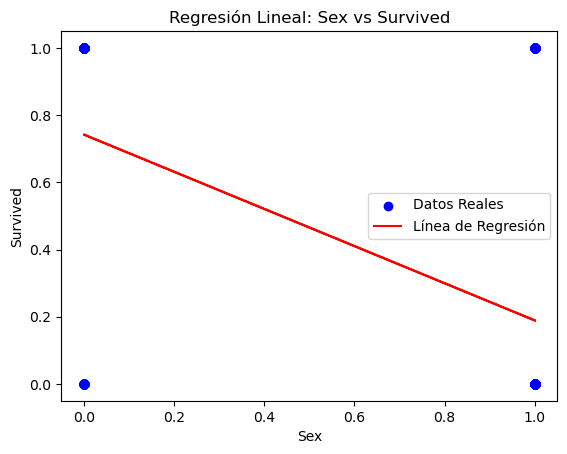

In [140]:
plt.scatter(x, y, color='blue', label='Datos Reales')  
plt.plot(x, modelo.predict(x), color='red', label='Línea de Regresión')  
plt.title('Regresión Lineal: Sex vs Survived')  
plt.xlabel('Sex')  
plt.ylabel('Survived')  
plt.legend()  
plt.show() 

## 8. Análisis Resultados

In [141]:
# Analisis del Intercepto (B0)

# El intercepto es [0.74203822] Esto representa la probabilidad de las mujeres de supervivencia.
# Para una mujer, el modelo predice que la probabilidad de supervivencia es aproximadamente 74.2%. Esto implica que, en promedio, 
# las mujeres tienen una tasa de supervivencia alta que los hombres.

# Analisis del Coeficiente (B1)

# Esto indica que los hombres, en comparación con las mujeres, tienen una probabilidad mucho menor de sobrevivir bajo las 
# condiciones dadas. Esta diferencia puede estar relacionada con varios factores, incluyendo la dinámica social en situaciones 
# de crisis, donde las mujeres y niños a menudo reciben prioridad en rescates.
